In [39]:
using LinearAlgebra
using Plots
using Distributions
using Random; Random.seed!(1234);

I want to explore how to get a shortcut to plot distributions.

In [40]:
Xs = 0:0.01:10
μ = sin.(Xs)
Σ = 0.1I
dist = MultivariateNormal(μ, Σ)

IsoNormal(
dim: 1001
μ: [0.0, 0.00999983, 0.0199987, 0.0299955, 0.0399893, 0.0499792, 0.059964, 0.0699428, 0.0799147, 0.0898785  …  -0.466405, -0.475227, -0.484002, -0.492728, -0.501405, -0.510032, -0.518608, -0.527132, -0.535603, -0.544021]
Σ: [0.01 0.0 … 0.0 0.0; 0.0 0.01 … 0.0 0.0; … ; 0.0 0.0 … 0.01 0.0; 0.0 0.0 … 0.0 0.01]
)


Now I want to explore how to best plot the GP and/or its prior distribution.

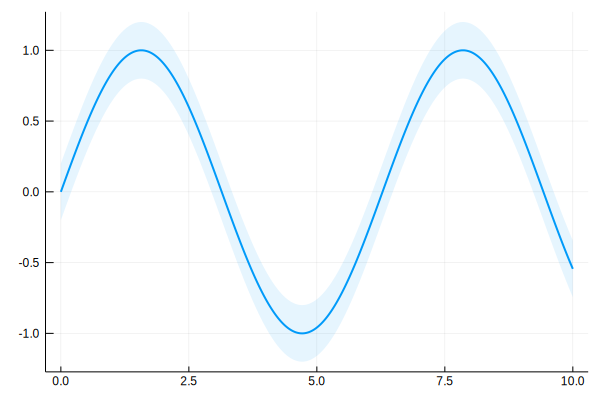

In [41]:
plot(
    Xs, dist.μ, 
    width=2, 
    ribbon=2sqrt.(diag(dist.Σ)), 
    fillalpha=0.1, 
    leg=false,
)

In [49]:
@recipe function f(dist::Distribution, x; std_dev_factor=2)
    y = dist.μ
    ribbon := std_dev_factor*sqrt.(diag(dist.Σ))
    fillalpha --> 0.1
    width --> 2
    x, y
end

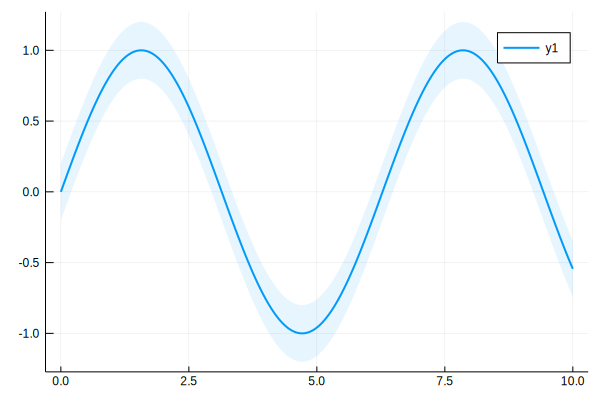

In [51]:
plot(dist, Xs)

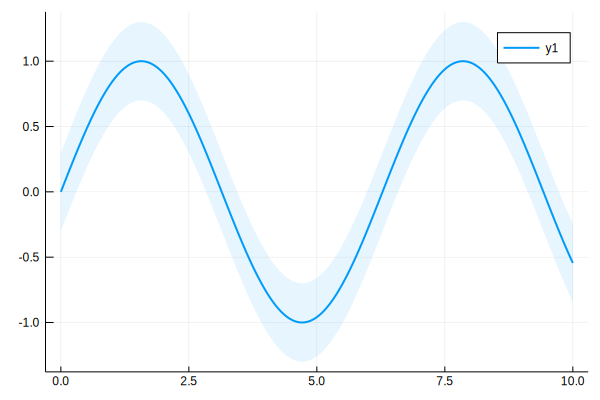

In [52]:
plot(dist, Xs, std_dev_factor=3)

# Nice!